<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я проверяла твой прошлый проект и буду проверять этот. 
    
Снова **ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме трех перечисленных.**
Также я попрошу тебя **не менять и не передвигать мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
 
        
<hr>
    
**По проекту:** эта работа тоже классно получилась. У меня есть рекомендации по улучшению, я их описала в комментариях. И кое-что надо будет подправить. 
</div>

>**<span style="color:blue">Привет! Я очень рада снова вместе поработать!)))</span>**
>
>**<span style="color:blue">Спасибо за твою оценку! И особенно за комментарии. Не скажу, что сразу знаю как надо исправить: приходится думать и копаться в информации. Но, в этом же и смысл обучения.) </span>**
>
>**<span style="color:blue">Писать буду так же синим.</span>**
>
>
>**<span style="color:blue">Было бы здорово, поработать вместе и на сборном проекте. У меня иногда прям руки опускаются, от того, как долго я соображаю, что нужно. И иногда кажется, что уж прям совсем не моё. А твои рекомендации дают мне надежду, что я не совсем потеряна для этой дисциплины.</span>**

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 2</b>
    
Ты себя недооцениваешь :) Возможно, и сборный проект буду проверять я. Тут уж как получится. А в этой работе остался один момент: округление производишь не тем методом.
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 3</b>
    
Супер! Работу могу принять :) Удачи :)
</div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

#### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

**Примечание**: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем все необходимые для решения поставленных задач библиотеки.

In [1]:
# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки matplotlib для работы с графиками>
import matplotlib.pyplot as plt

# <импорт библиотеки scipy>
from scipy import stats as st

pd.options.mode.chained_assignment = None

Прочитаем все файлы .csv и сохраним их в переменные *'***_df'*.

In [2]:
# <чтение файлов с данными о звонках и сохранением в calls_df>
calls_df = pd.read_csv('/datasets/calls.csv')

# <чтение файлов с данными об интернет-сессиях и сохранением в internet_df>
internet_df = pd.read_csv('/datasets/internet.csv')

# <чтение файлов с данными о сообщениях и сохранением в messages_df>
messages_df = pd.read_csv('/datasets/messages.csv')

# <чтение файлов с данными о тарифах и сохранением в tariffs_df>
tariffs_df = pd.read_csv('/datasets/tariffs.csv')

# <чтение файлов с данными о пользователях и сохранением в users_df>
users_df = pd.read_csv('/datasets/users.csv')

Рассмотрим каждый из датасетов по отдельности.

Начнем с данных о **пользователях** (*users_df*).

In [3]:
# <получение первых 5 строк таблицы df>
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
# <получение общей информации о данных в таблице users_df>
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
# <Посчитаем количество пропусков в каждом из столбцов>
users_df.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [6]:
# <Посчитаем количество дубликатов в таблице>
print('Количество дубликатов: {}'.format(users_df.duplicated().sum()))

Количество дубликатов: 0


In [7]:
# <Посмотрим сколько клиентов используют каждый из тарифов>
users_df['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Рассмотрим полученную информацию о пользователях подробнее.

Всего в таблице 8 столбцов, тип данных двух столбцов - *int64*, остальных шести - *object*.

Подробно разберём, какие в *users_df* столбцы и какую информацию они содержат:
* *user_id* — уникальный идентификатор пользователя;
* *first_name* — имя пользователя;
* *last_name* — фамилия пользователя;
* *age* — возраст пользователя (годы);
* *reg_date* — дата подключения тарифа (день, месяц, год);
* *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* *city* — город проживания пользователя;
* *tariff* — название тарифного плана.

На момент выгрузки данных на мдоступна информация о 500 пользователях:
* 351 – "Смарт";
* 149 – "Ультра".

462 пользователя всё ещё пользуются своим тарифом.

Столбцы *reg_date* (дата подключения тарифа) и *churn_date* (дата прекращения пользования тарифом) нужно перевести из формата *object* в тип данных *DateTime*.

Исследуем датасет с информацией о **тарифах** (*tariffs_df*).

In [8]:
# <получение первых 5 строк таблицы tariffs_df>
tariffs_df.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
# <получение общей информации о данных в таблице tariffs_df>
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Рассмотрим полученную информацию о тарифах подробнее.

Всего в таблице 8 столбцов с описанием опций каждого из тарифов. Тип данных семи столбцов - *int64*, одного - *object*.

Подробно разберём, какие в *tariffs_df* столбцы и какую информацию они содержат:
* *tariff_name* — название тарифа;
* *rub_monthly_fee* — ежемесячная абонентская плата в рублях;
* *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату;
* *messages_included* — количество сообщений в месяц, включённых в абонентскую плату;
* *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета;
* *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

В датасете *users_df* также присутствует столбец с наименованием тарифа (*tariff*). Для последующего удобства в работе с двумя датасетами переименуем столбец *tariff_name* в *tariff*.

In [10]:
# <Поменяем имя столбца 'tariff_name' на 'tariff'>
tariffs_df = tariffs_df.rename(columns={'tariff_name': 'tariff'})

Что ж, пропусков в этом датасете нет, столбец переименован.

Рассмотрим более подробно информацию о **сообщениях** (*messages_df*).

In [11]:
# <получение первых 5 строк таблицы messages_df>
messages_df.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
# <получение общей информации о данных в таблице messages_df>
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
# <Посчитаем количество пропусков в каждом из столбцов>
messages_df.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [14]:
# <Посчитаем количество дубликатов в таблице>
print('Количество дубликатов: {}'.format(messages_df.duplicated().sum()))

Количество дубликатов: 0


Всего в таблице 3 столбца: один с типом данных *int64*, два - *object*.

Подробно разберём, какие в *messages_df* столбцы и какую информацию они содержат:
* *id* — уникальный номер сообщения;
* *message_date* — дата сообщения;
* *user_id* — идентификатор пользователя, отправившего сообщение.

Пропусков, которые нужно заполнить, и дубликатов в датасете нет.

Столбец *message_date* (дата сообщения) нужно перевести из формата *object* в тип данных *DateTime*.

На очереди датасет с информацией об использовании клиентами **интернет-трафика** (*internet_df*).

In [15]:
# <получение первых 5 строк таблицы internet_df>
internet_df.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
# <получение общей информации о данных в таблице internet_df>
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
# <Посчитаем количество пропусков в каждом из столбцов>
internet_df.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [18]:
# <Посчитаем количество дубликатов в таблице>
print('Количество дубликатов: {}'.format(internet_df.duplicated().sum()))

Количество дубликатов: 0


Всего в таблице 5 столбцов: один с типом данных *float64*, два - *int64*, два - *object*.

Подробно разберём, какие в *internet_df* столбцы и какую информацию они содержат:
* *id* — уникальный номер сессии;
* *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах);
* *session_date* — дата интернет-сессии;
* *user_id* — идентификатор пользователя.

Пропусков, которые нужно заполнить, и дубликатов в датасете нет.

Столбец *session_date* (дата интернет-сессии) нужно перевести из формата *object* в тип данных *DateTime*.

Объём потраченного за сессию интернет-трафика указан в мегабайтах, в то время, как в тарифе в гигабайтах. Таким образом, если пользователь израсходует объем трафика, предоставленный тарифным планом, для анализа нам потребуется привести дополнительный объём трафика к гигабайтам, чтобы рассчитать стоимость.

Проверим сколько сессий с объёмом потраченного трафика меньше, чем 1 Мб.

In [19]:
print('Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб и больше 0: {}'
      .format(len(internet_df.query('mb_used < 1 and mb_used > 0'))))

print('Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб: {}'
      .format(len(internet_df.query('mb_used < 1 '))))

Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб и больше 0: 101
Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб: 19699


19699 сесий имеют объём потраченного интернет-трафика менее 1 Мб. Если сессия зарегестрирована значит трафик был, правда странно если он равен 0. Но исходя из условий - оператор округляет вверх значения мегабайтов. Применим метод np.ceil для приведения всех значений к большему числу, а так же все нули заменим на 1 и после поменяем тип на *int64*.

Ознакомимся более подробно с таблицей, содержащую информацию о **звонках** (*calls_df*).

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Да, с нулями не совсем ясно. Возможно, тут такая же логика, как и с нулевыми длительностями звонков. То есть это могли быть оборвавшиеся сессии.
</div>

In [20]:
# <получение первых 5 строк таблицы calls_df>
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [21]:
# <получение общей информации о данных в таблице calls_df>
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [22]:
# <Посчитаем количество пропусков в каждом из столбцов>
calls_df.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Всего в таблице 4 столбца: один с типом данных *float64*, один - *int64*, два - *object*.

Подробно разберём, какие в *calls_df* столбцы и какую информацию они содержат:
* *id* — уникальный номер звонка;
* *call_date* — дата звонка;
* *duration* — длительность звонка в минутах;
* *user_id* — идентификатор пользователя, сделавшего звонок.

Пропусков, которые нужно заполнить, и дубликатов в датасете нет.

Столбец *call_date* (дата звонка) нужно перевести из формата *object* в тип данных *DateTime*.

Посмотрим количество звоков длительностью меньше одной минуты.

In [23]:
print('Количетсво звонков с длительностью звонка менее 1 минуты: {}'.format(len(calls_df[calls_df.duration < 1])))

Количетсво звонков с длительностью звонка менее 1 минуты: 47927


47927 звонков было совершено менее минуты.
Здесь такая же ситуация и такое же правило, как с интернетом. Поэтому применим метод np.ceil для приведения всех значений к большему числу, а так же все нули заменим на 1 и после поменяем тип на *int64*.

### Вывод

Все датасеты открыты и изучены.
Для последующего удобства в работе с датасетами в таблице *tariffs_df* переименован столбец *tariff_name* в *tariff*.
**<span style="color:blue">Пропусков, которые нужно обратоботать, в таблице нет. 462 пропуска в столбце *churn_date* (дата прекращения пользования тарифом) в датасете *users_df* говорят нам о том, что тариф ещё используется абонентом. Их наличие никак не повлияет на результаты исследования.</span>**

По результатам обзора таблиц необходимо:
* ~<span style="color:blue">в датасете *users_df* необходимо заполнить 462 пропуска в столбце *churn_date* (дата прекращения пользования тарифом);</span>~
* столбцы *reg_date* (дата подключения тарифа) и *churn_date* (дата прекращения пользования тарифом) в датасете *users_df*, *message_date* (дата сообщения) в таблице *message_df*,  *session_date* (дата интернет-сессии) в датасете *internet_df* и *call_date* (дата звонка) в тавблице *calls_df* нужно перевести из формата *object* в тип данных *DateTime*;
* для датасетов *internet_df* и *calls_df* применим метод np.ceil для приведения всех значений к большему числу и после поменяем тип на *int64*.

### Шаг 2. Подготовьте данные

* Приведите данные к нужным типам, найдите и исправьте ошибки в данных

Приведем необходимые столбцы в тадафреймах в формат *DateTime*.

In [24]:
columns_to_datetime = {"reg_date":users_df,
                       "message_date":messages_df,
                       "session_date":internet_df,
                       "call_date":calls_df}

for column, frame in columns_to_datetime.items():
    frame[column] = pd.to_datetime(frame[column],format = '%Y-%m-%d')

Прежде чем менять тип данных в *internet_df* и *calls_df* в столбцах с объёмом потраченного за сессию интернет-трафика (в мегабайтах) и длительностью звонков в минутах применим метод *np.ceil* для приведения всех значений к большему числу, а так же все нули заменим на 1.

In [25]:
# <Интернет-сессии>
internet_df['mb_used'] = np.ceil(internet_df['mb_used'])
internet_df.loc[internet_df['mb_used'] == 0 ,'mb_used'] = 1

# <Звонки>
calls_df['duration'] = np.ceil(calls_df['duration'])
calls_df.loc[calls_df['duration'] == 0 ,'duration'] = 1

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Метод **ceil** не нуждает в **apply**. Можно его сразу ко всему столбцу применять.
</div>

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
Вот так делала? 
    
    
    internet_df['mb_used'] = np.ceil(internet_df['mb_used'])
</div>

>**<span style="color:blue">эм.. видимо, нет. Спасибо. (Как-то  глупо получилось: мне кажется и этот вариант я тоже пробовала.. но раз теперь сработало - тупо говорить, что пробовала.)</span>**

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера 3</h2>
    
Может, опечатка была. Или про numpy забыла.
</div>

Приведем столбцы *duration* (из датасета *calls_df*) и *mb_used* (из датасета *internet_df*) в формат *int64*.

In [26]:
# <Минуты и мегабайты>
calls_df['duration'] = calls_df['duration'].astype('int64')
internet_df['mb_used'] = internet_df['mb_used'].astype('int64')

~<span style="color:blue">Пропуски в таблице users столбец *churn_date* заполним исходя из того, что люди не живут дольше 110 лет, следовательно в этом возрасте человек точно прекратит пользоваться услугами компании. Прибавим к текущей дате разницу между 110 и возрастом абонента и заполним этим значением пропуски.</span>~

<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Зачем их заполнять? churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Пускай такой и будет, нам это не мешает же никак. А если и понадобится, то такая замена ведь тоже не будет актульной. 
</div>


>**<span style="color:blue">Принято и поправлено в выводе к Шагу 1.</span>**

Проверим, всё ли получилось. Для этого соберем всю информацию по датасетам в одну таблицу.

In [27]:
# <Создадим словарь соответствия фрейма и его имени>
dictionary_with_frames ={
    'calls_df': calls_df,
    'internet_df': internet_df,
    'messages_df': messages_df,
    'tariffs_df': tariffs_df,
    'users_df': users_df
}

# <Функция для агрегации данных о нескольких загруженных таблицах.
#  Собирает следующею информацию: количество объектов(строк) в данных,
#  количество null-значений и тип каждого столбца>
def get_stat(dict_of_frames):

    # <Функция отвечающая за создание промежуточных таблиц,
    #    собирая данные из конкретного переданного фрейма>
    def table(dataframe, name):
        
        columns = dataframe.columns
        count_of_rows = len(columns)
        total = dataframe.shape[0]
        
        total_table = pd.DataFrame(data =[[0] * 5] * count_of_rows, 
                                        columns = ['total',
                                                   'frame',
                                                   "columns",
                                                   "null_values",
                                                   "type"])
    
        total_table['total'] = [total] * count_of_rows
        total_table['frame'] = [name] * count_of_rows
        total_table['columns'] = columns
        
        for column in columns:
            curent_type = str(dataframe[column].dtype)
            count_of_null = dataframe[column].isnull().sum()
            total_table.loc[total_table['columns'] == column,'null_values'] = count_of_null
            total_table.loc[total_table['columns'] == column,'type'] = curent_type
        return total_table
        
    final_df = pd.DataFrame(columns = ['total','frame',"columns","null_values","type"])
    
    for name,frame in dict_of_frames.items():
        part_of_table = table(frame,name)
        final_df = final_df.append(part_of_table)
        
    final_df = final_df.reset_index(drop = True)
    final_df_grouped = final_df.groupby(['total','frame',"columns"]).sum()
    
    return final_df_grouped

get_stat(dictionary_with_frames)

null_values            type
total  frame       columns                                           
2      tariffs_df  mb_per_month_included            0           int64
                   messages_included                0           int64
                   minutes_included                 0           int64
                   rub_monthly_fee                  0           int64
                   rub_per_gb                       0           int64
                   rub_per_message                  0           int64
                   rub_per_minute                   0           int64
                   tariff                           0          object
500    users_df    age                              0           int64
                   churn_date                     462          object
                   city                             0          object
                   first_name                       0          object
                   last_name                        0          object
                   reg_date                         0  datetime64[ns]
                   tariff                           0          object
                   user_id                          0           int64
123036 messages_df id                               0          object
                   message_date                     0  datetime64[ns]
                   user_id                          0           int64
149396 internet_df Unnamed: 0                       0           int64
                   id                               0          object
                   mb_used                          0           int64
                   session_date                     0  datetime64[ns]
                   user_id                          0           int64
202607 calls_df    call_date                        0  datetime64[ns]
                   duration                         0           int64
                   id                               0          object
                   user_id                          0           int64

Отлично, всё форматы в норме, ошибок в таблицах нет.

* Посчитайте для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана;прибавьте абонентскую плату, соответствующую тарифному плану).

В датасетах *calls_df*, *messages_df* и *internet_df* создадим столбцы с номером тем месяца, в котором произошло событие.

In [28]:
# <Добавим столбец 'month' в таблицу 'calls_df'>
calls_df['month'] = calls_df["call_date"].dt.month
calls_df.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [29]:
# <Добавим столбец 'month' в таблицу 'messages_df'>
messages_df['month'] = messages_df["message_date"].dt.month
messages_df.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [30]:
# <Добавим столбец 'month' в таблицу 'internet_df'>
internet_df['month'] = internet_df["session_date"].dt.month
internet_df.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам

и соберем все данные в одну таблицу.

<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Здорово, что не боишься работать с функциями :) Это все можно сделать в разы проще. Попробуй просто-напросто склеить таблицы зконков, смс и трафика методом **outer**. А информацию по клиентам прилепишь методом **left**. Ты классно все делаешь, но если можно проще, то лучше делать проще :) И циклы не потребуются.
</div>

>**<span style="color:blue">Я чувствовала у себя пробел в этом, решила поразбираться. И, да, ты права: я потратила слишком много времени именно на это. Исправила более простым способом ниже.</span>**

In [31]:
# <Создадим сводные таблицы по месяцам для каждого пользователя с информацией по звонкам, смс и интернет-трафику>
calls = calls_df.pivot_table(index=['user_id','month'],values='duration', aggfunc=['count', 'sum'])
messages = messages_df.pivot_table(index=['user_id','month'],values='message_date', aggfunc='count')
internet = internet_df.pivot_table(index=['user_id','month'],values='mb_used', aggfunc='sum')

# <Создадим дата-фрейм со сводными данными>
month_stat = pd.DataFrame()

# <Создадим временный дата-фрейм tmp_df и преобразуем сводную таблицу calls из DataFrame в массив записей NumPy>
tmp_df = pd.DataFrame(calls.to_records())

# <Заполним дата-фрейм со сводными данными month_stat значениями tmp_df.
# Такой способ применен для выведения столбцов 'user_id' 'month' в отдельные, а не по которым сгруппирована таблица>
month_stat['user_id'] = tmp_df['user_id']
month_stat['month']   = tmp_df['month']
month_stat['count_calls']   = tmp_df.iloc[:, 2]
month_stat['calls_total_duration'] = tmp_df.iloc[:, 3]

# <Добавим в дата-фрейм со сводными данными month_stat значения из сводной таблицы с информацией по смс>
month_stat = month_stat.merge(messages, on=['user_id', 'month'], how='outer')

# <Добавим в дата-фрейм со сводными данными month_stat значения из сводной таблицы с информацией по интернет-трафику>
month_stat = month_stat.merge(internet, on=['user_id', 'month'], how='outer')

# <Присвои столбцам таблицы month_stat правильные названия>
month_stat.columns = ['user_id','month','count_calls', 'calls_total_duration','count_messages','total_mb_used']

# <Выедем полученную таблицу>
month_stat

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used
0,1000,5,22.0,164.0,22.0,2257.0
1,1000,6,43.0,187.0,60.0,23262.0
2,1000,7,47.0,346.0,75.0,14017.0
3,1000,8,52.0,418.0,81.0,14072.0
4,1000,9,58.0,478.0,57.0,14583.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17246.0
3210,1489,10,NaN,NaN,21.0,19599.0
3211,1489,11,NaN,NaN,20.0,17526.0
3212,1489,12,NaN,NaN,35.0,17349.0


In [32]:
# <Заменим пропущенные значения в столбцах на 0.
# При соединении датафреймов Pandas привел типы к float64 из-за NaN-ов. Приведем их к int64>
month_stat = month_stat.fillna(0).astype('int64')
    
# <Выведем общую информацию>
month_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
count_calls             3214 non-null int64
calls_total_duration    3214 non-null int64
count_messages          3214 non-null int64
total_mb_used           3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB


<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
fillna можно сразу ко всей таблице применить.
</div>

>**<span style="color:blue">Принято и поправлено.</span>**

In [33]:
# <Добавим в таблицу month_stat информацию о пользователях>
month_stat = month_stat.merge(users_df, on='user_id', how='left')

# <Удалим столбцы, информация которых не нужна для дальнейшего проведения анализа, для удобства >
del month_stat['age']
del month_stat['churn_date']
del month_stat['first_name']
del month_stat['last_name']
del month_stat['reg_date']

month_stat

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,city,tariff
0,1000,5,22,164,22,2257,Краснодар,ultra
1,1000,6,43,187,60,23262,Краснодар,ultra
2,1000,7,47,346,75,14017,Краснодар,ultra
3,1000,8,52,418,81,14072,Краснодар,ultra
4,1000,9,58,478,57,14583,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17246,Санкт-Петербург,smart
3210,1489,10,0,0,21,19599,Санкт-Петербург,smart
3211,1489,11,0,0,20,17526,Санкт-Петербург,smart
3212,1489,12,0,0,35,17349,Санкт-Петербург,smart


Посчитаем помесячную выручку с каждого пользователя: вычтитем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана, прибавим абонентскую плату, соответствующую тарифному плану.

После добавим помесячную выручку с каждого пользователя в таблицу в столбец *'income'*.

<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
- Определение функции внутри другой это плохая идея. Определяй снаружи.
- Старайся делать код универсальным и не использовать числовые значения. Прикинь, завтра тарифы поменяются и абонентские платы будут другие. Твой код перестанет быть актуальным. Доступ к этим переменным ты можешь брать прямо из таблицы с тарифами. 
- Попробуй сделать все же в одной функции. Если что, я помогу.
- Забыла округлить Гб вверх.    
</div>

>**<span style="color:blue">Согласна с тобой. Лучше использовать данные из таблиц. Затупила что-то.</span>**
>
>**<span style="color:blue">Поправила код ниже. Надеюсь, что правильно.</span>**

In [34]:
# <Создадим функцию, рассчитывающая доход копании с конкретного абонента>
def get_income(row):
   
    calls=row['calls_total_duration']
    messages=row['count_messages']
    internet=row['total_mb_used']
    tariff=row['tariff']
    
    
    if (tariff=='smart'):
        i=0
    else:
        i=1
        
    income = tariffs_df['rub_monthly_fee'][i] # <В доход всегда входит абонентская плата>
    income += (max(0, (calls - tariffs_df['minutes_included'][i])*tariffs_df['rub_per_minute'][i])
               # <Доход за перерасход по минутам разговора>
               +max(0, (messages - tariffs_df['messages_included'][i])*tariffs_df['rub_per_message'][i])
               # <Доход за перерасход по смс>
               +max(0, np.ceil((internet - tariffs_df['mb_per_month_included'][i])/1024))*tariffs_df['rub_per_gb'][i])
               # <Доход за перерасход интернет-трафика>
    
    return income     

# <Добавим помесячную выручку с каждого пользователя в таблицу в столбец 'income'>
month_stat['income'] = month_stat.apply(get_income, axis = 1)
month_stat

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,city,tariff,income
0,1000,5,22,164,22,2257,Краснодар,ultra,1950.0
1,1000,6,43,187,60,23262,Краснодар,ultra,1950.0
2,1000,7,47,346,75,14017,Краснодар,ultra,1950.0
3,1000,8,52,418,81,14072,Краснодар,ultra,1950.0
4,1000,9,58,478,57,14583,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17246,Санкт-Петербург,smart,950.0
3210,1489,10,0,0,21,19599,Санкт-Петербург,smart,1550.0
3211,1489,11,0,0,20,17526,Санкт-Петербург,smart,1150.0
3212,1489,12,0,0,35,17349,Санкт-Петербург,smart,950.0


<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
- round работает иначе.  Используй **ceil**. Это надо исправить.
    
- Есть еще функция, возвращающая максимум из двух чисел:


    max(a,b)
    
    
То есть у нас будет так:
    
    
    income = tariffs_df['rub_monthly_fee'][i]
    income += max(0, (calls - tariffs_df['minutes_included'][i])*tariffs_df['rub_per_minute'][i])
</div>

>**<span style="color:blue">Поправила код, по твоим замечаниям. Надеюсь, верно.</span>**
>
>**<span style="color:blue">Про *round()* поняла. Спасибо!</span>**

In [35]:
# КОД РЕВЬЮЕРА
round(2.5)

2

In [36]:
month_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
count_calls             3214 non-null int64
calls_total_duration    3214 non-null int64
count_messages          3214 non-null int64
total_mb_used           3214 non-null int64
city                    3214 non-null object
tariff                  3214 non-null object
income                  3214 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 251.1+ KB


Отлично, для каждого абонента известно сколько минут, смс и мегабайт потрачено в каждом месяце и сколько компания получила прибыли с каждого пользователя.

### Вывод

Данные во всех датасетах приведены к нужным типам, ошибки и пропуски обработаны.

Для каждого пользователя есть информация о количестве сделанных звонков и израсходованных минут разговора по месяцам, отправленных сообщений по месяцам, объеме израсходованного интернет-трафика по месяцам, а также, о помесячной выручке.

### Шаг 3. Проанализируйте данные

* Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Создадим сводную таблицу для каждого тарифа с медианными и средними значенииями, дисперсией и стандартным отклонением для минут разговора, количеству сообщений и объёму интернет-трафика.

In [37]:
month_stat_pivot = month_stat.pivot_table(index = 'tariff',
                        values = ['calls_total_duration','count_messages','total_mb_used','income'],
                        aggfunc = ['median','mean','var','std']
                       )
month_stat_pivot

median                                       \
       calls_total_duration count_messages  income total_mb_used   
tariff                                                             
smart                   435             28  1075.0         16540   
ultra                   532             38  1950.0         19324   

                       mean                                            \
       calls_total_duration count_messages       income total_mb_used   
tariff                                                                  
smart            429.450875      33.384029  1312.512337  16237.184388   
ultra            540.779695      49.363452  2071.065990  19488.703553   

                        var                                              \
       calls_total_duration count_messages         income total_mb_used   
tariff                                                                    
smart          37974.774628     796.812958  690458.161989  3.457199e+07   
ultra         106105.726823    2285.266143  143491.240560  1.019516e+08   

                        std                                           
       calls_total_duration count_messages      income total_mb_used  
tariff                                                                
smart            194.871174      28.227876  830.938122   5879.795158  
ultra            325.738740      47.804457  378.802377  10097.107541

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Отлично! Хочу еще привести тебе пример создания такой таблицы с нуля: 
</div>

In [38]:
# КОД РЕВЬЮЕРА

# Это все для мультиндекса
l1 = ['calls_total_duration','count_messages','total_mb_used','income']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nИндексы: ', idx[0], 'Первый: ', idx[0][0], 'Второй: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
    df.loc['smart',i] = np.round(month_stat.query('tariff=="smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(month_stat.query('tariff=="ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([('calls_total_duration', 'mean'),
            ('calls_total_duration',  'var'),
            ('calls_total_duration',  'std'),
            (      'count_messages', 'mean'),
            (      'count_messages',  'var'),
            (      'count_messages',  'std'),
            (       'total_mb_used', 'mean'),
            (       'total_mb_used',  'var'),
            (       'total_mb_used',  'std'),
            (              'income', 'mean'),
            (              'income',  'var'),
            (              'income',  'std')],
           )



Индексы:  ('calls_total_duration', 'mean') Первый:  calls_total_duration Второй:  mean


calls_total_duration                  count_messages                  \
                      mean      var     std           mean      var    std   
smart               429.45  37974.8  194.87          33.38   796.81  28.23   
ultra               540.78   106106  325.74          49.36  2285.27   47.8   

      total_mb_used                         income                  
               mean          var      std     mean     var     std  
smart       16237.2   3.4572e+07   5879.8  1312.51  690458  830.94  
ultra       19488.7  1.01952e+08  10097.1  2071.07  143491   378.8

>**<span style="color:blue">Круто! Спасибо большое. Почитала побольше про использование *.MultiIndex*. Раньше не видела примеров. Точнее, не возникало необходимости. И я не знала о таком способе. Буду практиковать. Способов решения одной задачи невероятное множество!</span>**

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
Да, сохрани себе этот примерчик. 
</div>

Для наглядности построим для каждого параметра гистограмму.

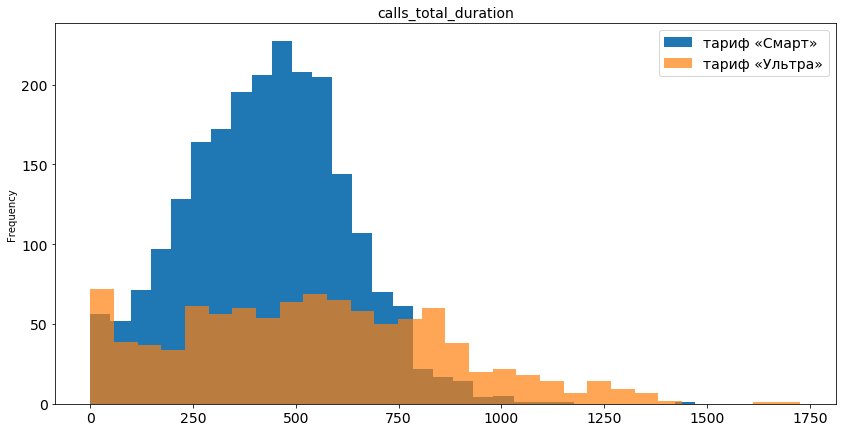

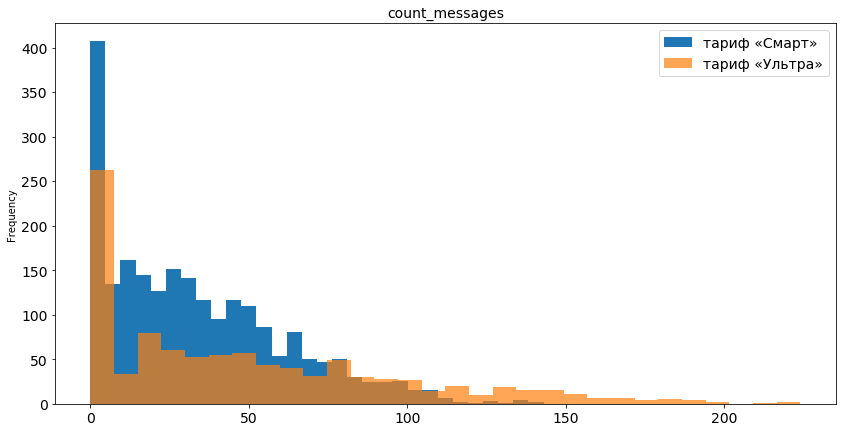

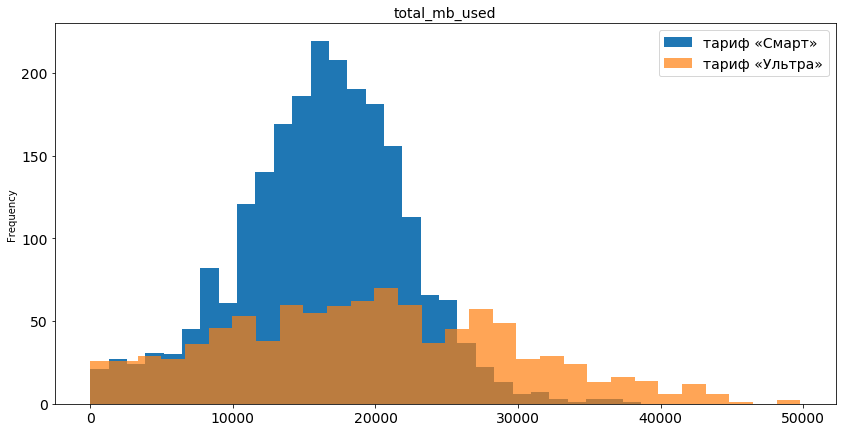

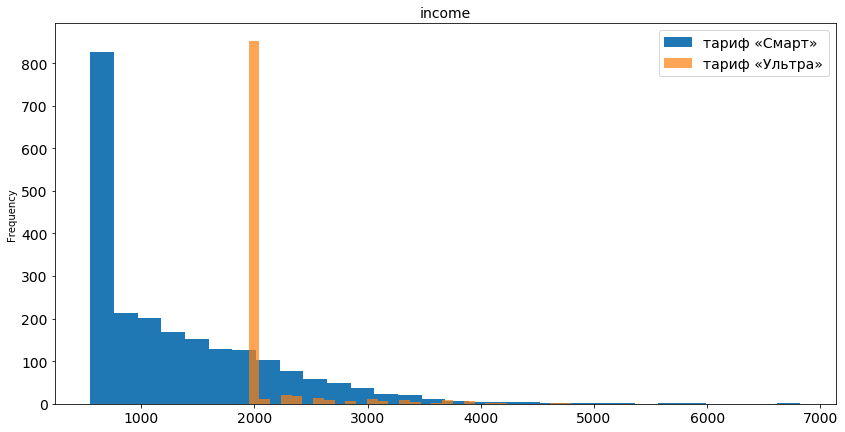

In [39]:
columns_list = ['calls_total_duration','count_messages','total_mb_used','income']
tariffs = ['ultra','smart']
for column in columns_list:
        month_stat.loc[month_stat.loc[:,'tariff'] == 'smart'][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'тариф «Смарт»',
                                                                            figsize = (14,7), fontsize=14
                                                                           )
        month_stat.loc[month_stat.loc[:,'tariff'] == "ultra"][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.7,
                                                                            label = 'тариф «Ультра»',
                                                                            figsize = (14,7), fontsize=14
                                                                           )
        plt.title(column, fontsize=14)
        plt.legend(fontsize=14)
        plt.show()

### Вывод

<span style="color:blue">Распределения звонков и интернет-трафика двух тарифов близки к нормальным, однако гистограммы тарифа «Смарт» в большинстве своём скошены отрицательно (т. е. имеют дополнительные значениямя слева), в то время как у тарифа «Ультра» - положительно (т. е. имеют дополнительные значениямя справа). Об этом можно сделать вывод и глядя на медианные и средние значения в сводной таблице.</span>

<span style="color:blue">А распределения количества смс и дохода двух тарифов похожи больше на распределение Пуассона. Гистограммы обрезаны на:</span>
* <span style="color:blue">нуле для смс;</span>
* <span style="color:blue">на значениях абонентской платы для дохода</span>

<span style="color:blue">и имеют длинный «хвост» в положительную сторону.</span>

<span style="color:blue">И действительно: форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо. Таким образом, можно сделать вывод, что пользователи тарифа «Смарт» чаще тратят базовый пакет сообщений и чаще доплачивают компании сверх абонентской платы по тарифу, нежели пользователи тарифа «Ультра».</span>
   
<span style="color:blue">Так же, сравнивая дисперсии и стандартные отклонения по двум тарифам можно сказать, что разброс данных от среднего для тарифа «Ультра» больше, данные тарифа «Смарт» более собраны вокруг среднего.</span>

Кроме того, пользователи тарифа «Ультра» не тратят весь базовый пакет не только минут количества сообщейний, но и минут, в отличие от абонентов тарифа «Смарт».</span>

<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Добавь более конкретное описание распределений, с точки зрения нормальности. Похожи на нормальное или нет.</div>

<div class="alert alert-warning" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
Да, интернет трафик и звонки распределены почти нормально. Но вот оставшиеся распределения не похожи на нормальные. Похожи на распределение Пуассона. Его часто используют для моделирования частоты редких событий в некотором интервале, при условии, что у этих событий все же есть некая интенсивность. Ну, например, сколько раз за 30 минут мимо нас проедет автобус.
</div>

>~**<span style="color:blue">Принято и поправлено.</span>**~
>
>**<span style="color:blue">Принято и, надеюсь, поправлено.</span>**

### Шаг 4. Проверьте гипотезы

* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Необходимо сравнить две генеральных совокупности. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод *scipy.stats.ttest_ind (array1, array2, equal_var)*.

Нулевой гипотезой (**H<sub>0</sub>**) объявим "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны".

Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Критический уровень статистической значимости (*alpha*) зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [40]:
# <Зададим критический уровень статистической значимости>
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

# <Из таблици со статистикой по пользователям выделим два датасета с выручкой компании в зависимости от тарифа>
ultra_inc = month_stat.loc[month_stat.loc[:,'tariff'] == 'ultra']['income']
smart_inc = month_stat.loc[month_stat.loc[:,'tariff'] == 'smart']['income']

# <Применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где scipy.stats импортировано в начале как st>
result = st.ttest_ind(ultra_inc,smart_inc) 

# <Выведем уровень значимости, на котором находятся друг от друга среднее значение и то, с которым производится сравнение>
print("p-значение:{:.1%}".format(result.pvalue))

# <Сравним полученное значение уровня значимости с критическим уровнем и выведем отвержение или наоборот нулевой гипотезы>
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.0%
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - наша гипотеза подтвердилась. Об этом можно сделать вывод из очень малого околонулевого значения уровня значимости, на котором находятся друг от друга средние значения двух датасетов по тарифам. Случайно получить такое отличие в значениях почти невозможно.

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Да, различие там большое. Вообще, средняя выручка с бюджетного тарифа не дотягивает даже до абонентской платы дорогого тарифа.
</div>

* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Тут мы будем объёдинять выборки по тарифам, и, поэтому следует проверит отличаются ли дисперсии совокупностей по регионам.

In [41]:
# <Из таблици со статистикой по пользователям выделим два датасета с выручкой компании в зависимости от региона>
moscow_inc = month_stat.loc[month_stat.loc[:,'city'] == 'Москва']['income']
other_inc = month_stat.loc[month_stat.loc[:,'city'] != 'Москва']['income']

# <Выведем значения дисперсий для каждой из совокупностей>
print('Дисперсия совокупности абонентов Москвы:',np.var(moscow_inc))
print('Дисперсия совокупности абонентов других регионов:',np.var(other_inc))

Дисперсия совокупности абонентов Москвы: 566403.5469261038
Дисперсия совокупности абонентов других регионов: 663210.7680965652


Дисперсии отличаются. Поэтому необходимо сравнить две генеральных совокупности. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод *scipy.stats.ttest_ind (array1, array2, equal_var)*, только в этот раз зададим параметр *equal_var* равным *False*.

Нулевой гипотезой (**H<sub>0</sub>**) объявим "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".

Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Критический уровень статистической значимости (*alpha*) аналогично зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [42]:
# <Применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где scipy.stats импортировано в начале как st>
result = st.ttest_ind(moscow_inc,other_inc, equal_var=False) 

# <Выведем уровень значимости, на котором находятся друг от друга среднее значение и то, с которым производится сравнение>
print("p-значение:{:.1%}".format(result.pvalue))

# <Сравним полученное значение уровня значимости с критическим уровнем и выведем отвержение или наоборот нулевой гипотезы>
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:56.0%
Не получилось отвергнуть нулевую гипотезу


Уровни значимости, на котором находятся друг от друга средние значения двух датасетов составляет 51.7%, что говорит нам о том, что наша гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" - не подтвердилась. Прибыль от москвичей с вероятностью почти в 52% совпадает с доходом от регионов.

* Поясните:
    * как вы формулировали нулевую и альтернативную гипотезы;
    * какой критерий использовали для проверки гипотез и почему.

При формулировании нулевых гипотез (**H<sub>0</sub>**) для проверки гипотез необходимых для исследования выбирался знак равенства, т. е. мы говорили в (**H<sub>0</sub>**) о том что выручки по тарифам и регионам **РАВНЫ**. Соответственно, для формулирования альтернативной гипотезы (**H<sub>1</sub>**) выбирался знак неравенства.

В качестве критерия проверки гипотез мы использовали и сравнивали средние значения выборок генеральных совокупностей, т. к., согласно центральной предельной теореме, по среднему, рассчитанному из выборки, можно судить о среднем генеральной совокупности, причём чем больше выборка, тем точнее — и это работает для генеральной совокупности, распределённой каким угодно образом, и выборочные средние нормально распределены вокруг значения, точно равного среднему генеральной совокупности.

### Вывод

В первом случае нулевая гипотеза отверглась, т. е. подтвердилась гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а во втором - нулевую гипотезу отвергнуть не получилось: из чего мы можем сделать вывод, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. опровергли своё предположение.

### Шаг 5. Напишите общий вывод

В процессе работы, было выявлено, что в целом данные приходят достаточно чистые, за исключением таблицы *users_df* (столбец *churn_date* имел много пропусков). Возможно, стоит при сборе данных об окончании пользования тарифом дополнительно помечать абонентов, всё ещё использующих тариф, каким-то максимально разумным значением или же условным нулем, чтобы упростить предобработку данных. Тем более, возможна ситуцаия, когда над подобными данными будут работать несколько аналитиков и каждый из них определит для себя индивидуальный маркер, то в дальнейшем при объединении результатов работ могут появиться баги, которые сложно будет отловить.

Используя обработанные данные мы проверили выдвинутые гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В первом случае нулевая гипотеза отверглась, т. е. подтвердилась гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а во втором - нулевую гипотезу отвергнуть не получилось: из чего мы можем сделать вывод, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. опровергли своё предположение.

Так же, можно отметить, что в среднем разница медианных и среднеарифметических значений дохода с разных тарифов отличается примено на 1000 в пользу тарифа «Ультра».

Рекламный бюджет выгоднее всего перераспределить в пользу тарифа «Ультра», несмотря на то, что в отличие от абонентов тарифа «Смарт», его абоненты не покупают дополнительные минуты и смс. К тому же, медианное и среднее значение прибыли от абонентов тарифа «Ультра» выше.

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера</b>
    
Хороший вывод. С рекомендацией согласна.
</div>

>**<span style="color:blue">Спасибо большое за твои рекомендации и комментрарии. Мой проект был каким-то усложнённым в решении. Соглашусь с тобой: чем проще, тем лучше. Буду впредь стараться снала подумать, чем сразу писать. Надеюсь, что смогу перейти к Сборному проекту!</span>**
>
>**<span style="color:blue">Отдельное спасибо за пример использования Мультиндекса!</span>**

<div class="alert alert-success" style="border-radius: 15px">
<b> Комментарий ревьюера 2</b>
    
Рада помочь :)
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  данные приведены к нужным типам
- [x]  найдены и исправлены ошибки в данных
- [x]  для каждого пользователя посчитано количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  для каждого пользователя посчитано количество отправленных сообщений по месяцам
- [x]  для каждого пользователя посчитан объем израсходованного интернет-трафика по месяцам
- [x]  для каждого пользователя посчитана помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана;прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  посчитано среднее количество, дисперсия и стандартное отклонение для параметров, описывающих поведение клиентов оператора
- [x]  построены гистограммы и описаны распределения для параметров, описывающих поведение клиентов оператора
- [x]  описано поведение клиентов оператора, исходя из выборки (количество минут разговора, количество сообщений и потребный объём интернет-трафика для пользователей каждого тарифа в месяц)
- [x]  проверена гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
- [x]  проверена гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- [x]  дано пояснение о том как были сформулированы нулевая и альтернативная гипотизы
- [x]  дано пояснение, какой критерий использовали для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод